In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as ks
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df['target'] = pd.DataFrame(data = housing.target, columns = housing.target_names)
# print(y)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


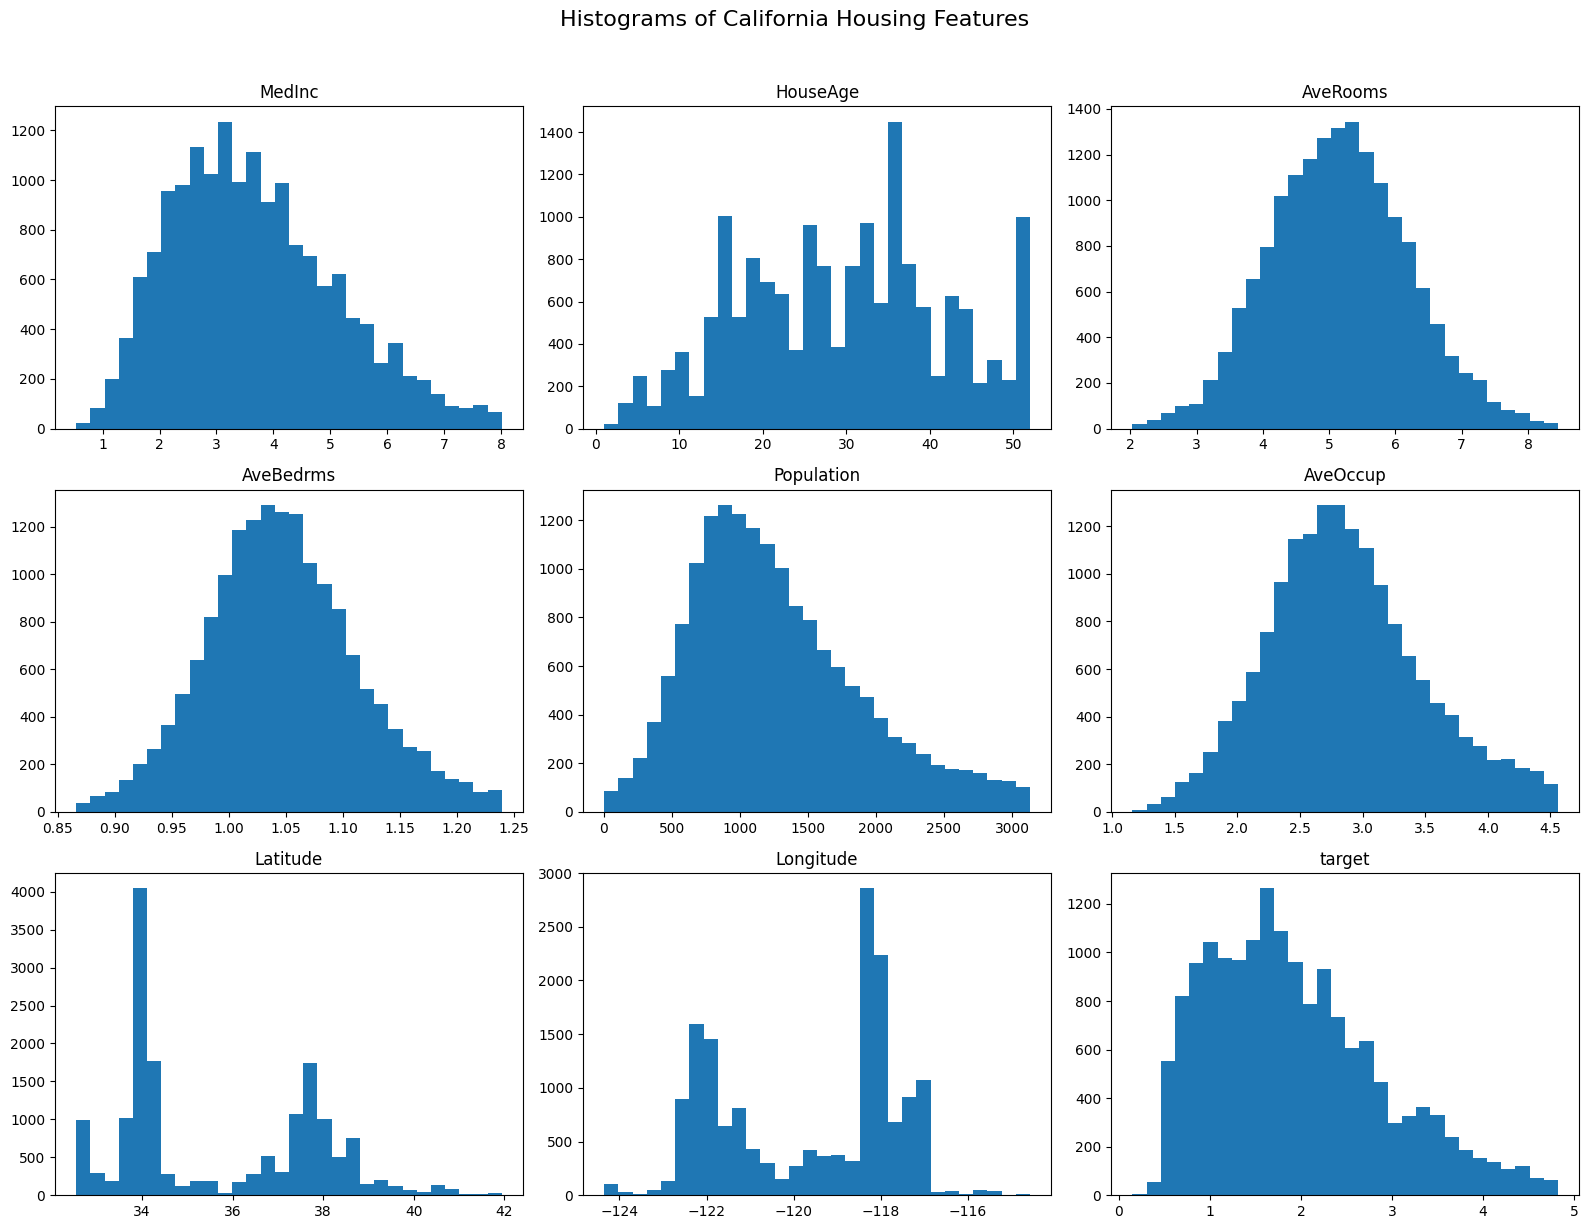

In [ ]:
#Checking the features data distribution with histogram
df.hist(bins=30, figsize=(16, 12), grid=False)
plt.suptitle("Histograms of California Housing Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#Check for null values
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Filtering out outliers indetified using IQR

In [ ]:
# Get the IOR and identify the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR))
df[outliers].count()

MedInc         681
HouseAge         0
AveRooms       511
AveBedrms     1424
Population    1196
AveOccup       711
Latitude         0
Longitude        0
target        1071
dtype: int64

In [ ]:
df = df[~outliers].dropna() #Dropping the outliers

In [ ]:
df[outliers].count()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [ ]:
df.count()

MedInc        16312
HouseAge      16312
AveRooms      16312
AveBedrms     16312
Population    16312
AveOccup      16312
Latitude      16312
Longitude     16312
target        16312
dtype: int64

In [ ]:
X = df.drop(['target'],axis = 1)
y = df['target']

In [ ]:
# Split dataset into train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((12234, 8), (4078, 8), (12234,), (4078,))

In [ ]:
# Split train dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9787, 8), (2447, 8), (9787,), (2447,))

In [ ]:
#Scaling the independent data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

Building a Linear Regression Model

In [ ]:
linear = LinearRegression()
linear.fit(X_train_sc,y_train)
y_linear_pred = linear.predict(X_test_sc)

mae_linear = mean_absolute_error(y_test, y_linear_pred)
mse_linear =  mean_squared_error(y_test,y_linear_pred)
r2_linear = r2_score(y_test, y_linear_pred)

#Evaluating the linear models performance
print("MAE", mae_linear)
print("MSE:", mse_linear)
print("R2 Score:", r2_linear)

MAE 0.4216804331570128
MSE: 0.30936471365480045
R2 Score: 0.6421351786261946


In [ ]:
# Scores for Linear model with outliers
# Reg = LinearRegression()
# Reg.fit(X_train_sc, y_train)
# y_pred = Reg.predict(X_test_sc)

# print("MAE: ", mean_absolute_error(y_test, y_pred))
# print("MSE: ", mean_squared_error(y_test, y_pred))
# print("R2 Score: ", r2_score(y_test, y_pred))

Building and Evaluation ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#Speciify hidden layers with activation functions and number of neurons
Layers = [
    Dense(units=30, activation="relu", input_shape=X_train_sc.shape[1:]), #Getting tge shape 8 from x_tr_sc
    Dense(units=10, activation="relu", name='HiddenLayer1'),
    Dense(units=5, activation="relu", name='HiddenLayer2'),
    Dense(units=1)
]

model_ann = Sequential(Layers)
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 HiddenLayer1 (Dense)        (None, 10)                310       
                                                                 
 HiddenLayer2 (Dense)        (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


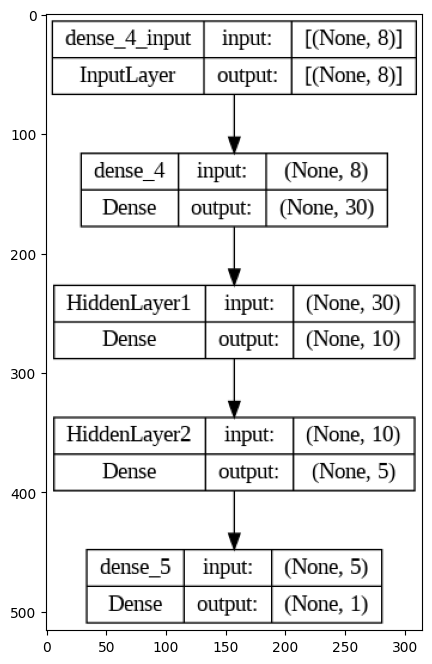

In [ ]:
# Plot the model architecture
tf.keras.utils.plot_model(model_ann, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot
plt.figure(figsize=(12, 8))
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.show()

In [ ]:
LOSS = "mse" # MSE suitable for data with less outliers (MAE for data with more outliers)
OPTIMIZER = "sgd"

model_ann.compile(optimizer=OPTIMIZER, loss=LOSS)

In [ ]:
EPOCHS = 40
history = model_ann.fit(X_train_sc, y_train, epochs=EPOCHS, validation_data=(X_val_sc, y_val))
history

Epoch 1/40
306/306 [==============================] - 1s 3ms/step - loss: 0.6053 - val_loss: 0.3962
Epoch 2/40
306/306 [==============================] - 1s 3ms/step - loss: 0.3513 - val_loss: 0.3293
Epoch 3/40
306/306 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3054
Epoch 4/40
306/306 [==============================] - 1s 2ms/step - loss: 0.2959 - val_loss: 0.2934
Epoch 5/40
306/306 [==============================] - 1s 2ms/step - loss: 0.2869 - val_loss: 0.2828
Epoch 6/40
306/306 [==============================] - 1s 3ms/step - loss: 0.2811 - val_loss: 0.2780
Epoch 7/40
306/306 [==============================] - 1s 2ms/step - loss: 0.2770 - val_loss: 0.2747
Epoch 8/40
306/306 [==============================] - 1s 4ms/step - loss: 0.2735 - val_loss: 0.2752
Epoch 9/40
306/306 [==============================] - 1s 4ms/step - loss: 0.2714 - val_loss: 0.2740
Epoch 10/40
306/306 [==============================] - 1s 4ms/step - loss: 0.2694 - val_loss: 0.2711

128/128 [==============================] - 0s 2ms/step - loss: 7729.7090


<Axes: >

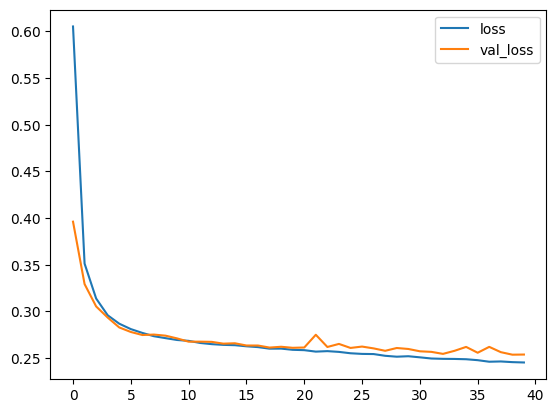

In [ ]:
model_ann.evaluate(X_test,y_test)
pd.DataFrame(history.history).plot()

In [ ]:
model_ann.evaluate(X_test,y_test)

128/128 [==============================] - 0s 2ms/step - loss: 6348.9072


6348.9072265625

In [ ]:
y_pred_ann = model_ann.predict(X_test_sc) #Making predictions using the trained ANN model

mse_ann = mean_squared_error(y_pred_ann,y_test)
r2_ann = r2_score(y_pred_ann,y_test)

128/128 [==============================] - 0s 2ms/step


In [ ]:
print("MSE for Linear Regression Model:", mse_linear )
print("R2 Score for Linear Regression Model:", r2_linear)
print("MSE for ANN:", mse_ann)
print("R2 Score for ANN:", r2_ann)

MSE for Linear Regression Model: 0.30936471365480045
R2 Score for Linear Regression Model: 0.6421351786261946
MSE for ANN: 0.23506308636901593
R2 Score for ANN: 0.6226236333452213


The ANN has a lower MSE, indicating better accuracy in predicting values.

The Linear Regression Model has a slightly higher R2 Score, suggesting a slightly better explanation of the variance in the data.

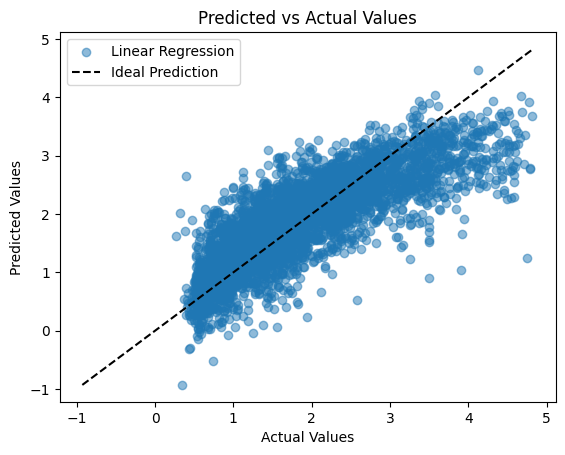

In [ ]:
# Scatter plot for Linear Regression
plt.scatter(y_test, y_linear_pred, label='Linear Regression', alpha=0.5)

# Line of equality (y=x) for reference
min_val = min(np.min(y_test), np.min(y_linear_pred), np.min(y_pred_ann))
max_val = max(np.max(y_test), np.max(y_linear_pred), np.max(y_pred_ann))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predicted vs Actual Values')
plt.show()

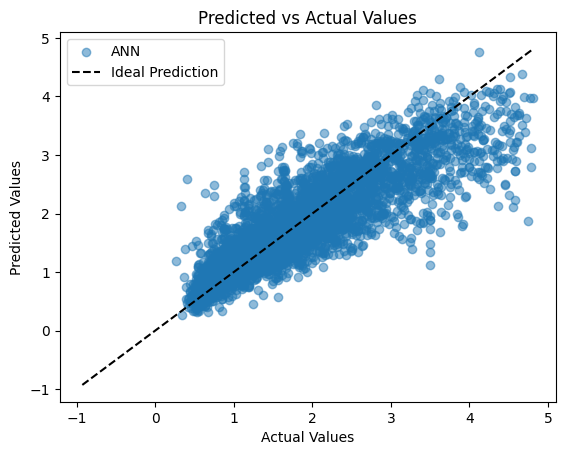

In [ ]:
# Scatter plot for ANN
plt.scatter(y_test, y_pred_ann, label='ANN', alpha=0.5)

# Line of equality (y=x) for reference
min_val = min(np.min(y_test), np.min(y_linear_pred), np.min(y_pred_ann))
max_val = max(np.max(y_test), np.max(y_linear_pred), np.max(y_pred_ann))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predicted vs Actual Values')
plt.show()